# Linear models

Machine learning is about learning patterns from data. _Deep learning_ is a subset of machine learning, where we'll build neural networks to identify patterns. We'll first need a strong understanding of _linear models_.

> ### What's a linear model?
> A _linear model_ is simply an equation where each term is either:
  - a constant, or
  - a product of a parameter and a variable

> For example, $ax + b = 0$ and $ax^2 + bx + c = 0$ are both linear models where $x$ is a variable  and $a, b, c$ are constant terms. 

> Despite the $x^2$ term, $ax^2+bx+c = 0$ is a linear model because the model is linear in the _parameter_ $x^2$: we multiply it by some constant $a$. If this is confusing, imagine setting $x' = x^2$ and substituting it into the model: then our model is $ax' + bx +c = 0$, which is easier to identify as linear.

We'll find out soon that the core of all neural networks is a set of nonlinear functions. This nonlinearity makes neural networks - as you might have heard - very powerful. Soon we'll build those nonlinear functions ourselves.

First, we need to build a few linear functions. Then we can transform them into a powerful nonlinear form. 

## Lines in higher dimensions
Most students will be familiar with the equation of a line. For example, $y = -2x$ is an equation for a line. Rewriting this equation lets us generalize the line equation to higher dimensions. First, convert into the normal form, $2x + y = 0$. Then, we can represent the normal form as the dot product $\big\langle (2,1), (x,y) \big\rangle = 0$.
Finally, we can represent all lines passing through any point by adding a _bias_ weight. The _bias_ is a constant; for example, the line equations
$$
\big\langle (2,1), (x,y) \big\rangle -1 = 0 \\
2x + y = 1 \\
y = -2x + 1
$$
are equivalent. Finally, we can generalize this linear model to the form most popular in machine learning:
$$
w^Tx + b = 0
$$
which expands to the equation of a _hyperplane_: $w_1x_1 + w_2x_2 + \dots + w_nx_n + b = 0$. That looks uncoincidentally like our original line equation, but now in $n$ dimensions: in fact, a point is a _hyperplane_ in $1$-dimensional space, a line is a _hyperplane_ in $2$-dimensional space, and a plane is a _hyperplane_ in $3$-dimensional space.


> ### The hyperplane
> _Hyperplane_: A subspace that separates a vector space into two parts. A linear equation for a _hyperplane_ lets us perform classification (for two classes) easily: an input we want to classify as class $0$ or class $1$ is either above or below the _hyperplane_.

> Formally, a _hyperplane_ is a subspace of dimension $n-1$ inside an $n$-dimensional space.

 >> ![](https://i.imgur.com/QCDR8MU.png)
 >> __Left:__ a line is a hyperplane in $2$-D space. __Right__: a plane is a hyperplane in $3$-D space.

### Classification using hyperplanes

A _decision function_ performs classification: given a point, it classifies that point as belonging to a certain set. 

Let's define a function $f:\mathbb{R}^n\rightarrow \mathbb{R}$. If you're not familiar with this notation, it just means that $f$ takes an $n$-dimensional input, and outputs a real number. We'll define $f$ using our hyperplane equation.
$$
f(x) = w^T x + b
$$
Then two points --- let's call them $x_1, x_2$ ---  located on opposite sides of that hyperplane will together satisfy one of the following inequalities:
$$
f(x_1) < 0 < f(x_2) \\
f(x_2) < 0 < f(x_1)
$$

So our _decision function_ could be as concise as $sign\big(f(x)\big)$, since that function outputs whether $f(x) > 0$ or $f(x) < 0$.

## Perceptron algorithm



The __perceptron__ is a learning algorithm. It finds a separating _hyperplane_ by minimizing the distance of misclassified points to the _decision boundary_.

### Training

All machine learning models need to be trained (fitted) to adjust their parameters and learn from a dataset. The perceptron is no exception. A perceptron finds its separating hyperplane $f(x) = w^T x + b$ by repeating two steps:
1. Check if the separating hyperplane misclassified (made a mistake on) any point.
2. If so, _update_ the coefficient vector ($w$) and bias ($b$) to remove that mistake.

The algorithm stops once all points are correctly classified. We can _update_ $w$ and $b$ to fix a mistaken classification using the following rule:

#### Perceptron update rule
Let $x= $ an input point (e.g. a column vector), and $y \in \{0, 1\}= $ the ground truth label for that point. $f(x)$ satisfies one of three conditions:
1. If $f(x) = y$, then $f(x)$ made no mistake; no change.
2. If $f(x) = 1$ but $y=0$, then $w \leftarrow w-x$.
3. If $f(x) = 0$ but $y=1$, then $w \leftarrow w+x$.

We can condense this update rule further by observing that the expression $\big(y-f(x)\big)\in \{ -1, 1\}$ whenever $f(x)$ has made a mistake. Condensing (2.) and (3.):

1. If $f(x) = y$, no change
2. Else $w \leftarrow w + \big(y-f(x)\big)\cdot x$

This update rule pushes the hyperplane closer to any point misclassified by the perceptron. Perceptron convergence is guaranteed for any _linearly separable_ dataset.

#### Simplifying out $b$
You'll notice we omitted any mention of the bias term $b$ in the update rule. For simplicity, linear models often append the bias term to the weight vector $w$. Appending $1$ to an input point $x$ lets us effectively compute the bias term using our dot product:

\begin{align*}
w := \begin{bmatrix}w_0\\w_1\\ \vdots \\ w_n \end{bmatrix} \quad x := \begin{bmatrix} x_0\\x_1\\ \vdots \\ x_n\end{bmatrix} & \quad \quad \quad
w' := \begin{bmatrix}w_0\\w_1\\ \vdots \\ w_n \\ b \end{bmatrix} \quad x' := \begin{bmatrix} x_0\\x_1\\ \vdots \\ x_n \\ 1\end{bmatrix} \\ \\
\langle w', x' \rangle &= w_0 x_0 + w_1 x_1 + \dots + w_n x_n + b(1) \\
&= \langle w, x \rangle + b
\end{align*}


### Psuedocode

```
X, y = training_data, training_labels
w = [0, 0, ..., 0]
b = 0
while(any points misclassified):
    for each (x, y) in (X, Y):
         f = w^T * x
         w = w + (y-f)*x
```

This version of the perceptron algorithm is considered the _Rosenblatt perceptron_. Other variations of the perceptron allow you to set a _hyperparameter_ $\eta$ (_eta_) which controls the rate of convergence of the separating hyperplane. Deep learning texts often refer to $\eta$ as the _learning rate_, since the $\eta$ term directly affects the rate at which an algorithm updates.

The learning rate $\eta$ does this by scaling the update rule: instead of setting $w \leftarrow w+\big(y - f(x)\big)\cdot x$, we set $w \leftarrow w + \eta\big(y-f(x)\big)\cdot x$. A larger $\eta$ (e.g. $\eta > 1 $) will tend to converge to a separating hyperplane faster, but also risks converging more slowly due to overshooting the decision boundary. A smaller $\eta$ (e.g. $\eta < 1$) will potentially find a more optimal separating hyperplane (i.e. one that maximizes distance to all points), but will also take longer to converge as we need to perform more updates.

We'll encounter this tradeoff between speed and cost again very soon, especially while learning about _gradient descent_.

> ### Hyperparameters
Neural networks by definition 'learn' parameters (weights) from training data. We can configure how a neural network learns by setting _hyperparameters_, which are continuous/integer-valued values manually set prior to training a model. The perceptron learning rate term $\eta$ is a hyperparameter set by you prior to the learning process.

### Implementation
Here's a quick `numpy` implementation.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
X = np.array([
    [0.8, 0.4],
    [0.3, 0.1],
    [0.8, 0.8],
    [0.4, 0.6],
    [0.6, 0.8],
    [0.4, 0.2],
    [0.4, 0.5],
])
Y = np.array([0, 0, 1, 1, 1, 0, 1])

In [ ]:
def plot_points(X, Y, ax, c_pos='b', c_neg='r'):
    for i, x in enumerate(X):
        ax.scatter(x[0], x[1], s=120, 
                   marker=('_' if Y[i] <= 0 else '+'), linewidths=2, 
                   c=(c_neg if Y[i] <= 0 else c_pos))

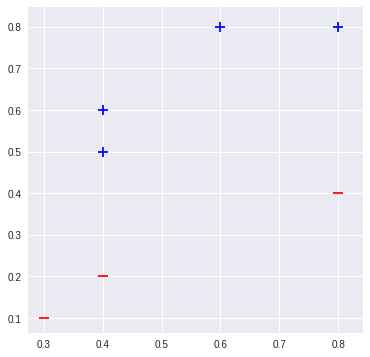

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
plot_points(X, Y, ax)

In [ ]:
def train(X, Y):
    w = np.zeros(X.shape[1]+1)
    epochs = 100
    for e in range(epochs):  
        for x, y in zip(X, Y):
            pred = np.where((np.dot(w[:2], x)+w[2]) >= 0.0, 1, 0)
            w[:2] += (y-pred) * x
            w[2] += (y-pred)
    return w

def predict(w, x):
    return np.where((np.dot(w[:2], x)+w[2]) > 0.0, 1, 0)

In [ ]:
w = train(X, Y)

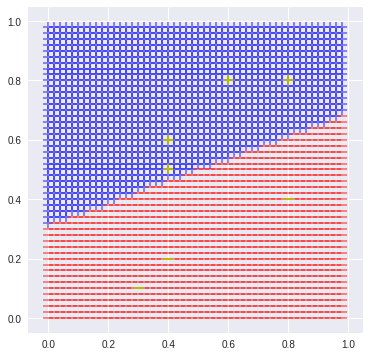

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
for a in range(0, 50):
    for b in range(0, 50):
        i, j = a/50, b/50
        p = predict(w, [i, j])
        ax.scatter(i, j, s=120, marker=('_' if p <= 0 else '+'), linewidths=2,
                   c=('r' if p <= 0 else 'b'), alpha=0.5
                   )
plot_points(X, Y, ax, c_pos='y', c_neg='y')

But linear models have limitations. In the 1980s the perceptron algorithm represented the state-of-the-art in deep learning, but it can't learn the XOR function:

\begin{align*}
f\big([0,1], w\big) &= 1 \\
f\big([1,0], w\big) &= 1 \\
f\big([1,1], w\big) &= 0 \\
f\big([0,0], w\big) &= 0
\end{align*}

Limitations like these resulted in the first AI winter.